## Lab 4.3

#### Setup your imports

In [1]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Pull the training set from the newsgroup data

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
X = newsgroups_train.data
y = newsgroups_train.target

#### 2. Create the vectorizer 

In [3]:
countv = CountVectorizer()

#### 3. Create the Truncated Singular Value Decomposition

In [4]:
tsvd = TruncatedSVD()

#### 4. Setup your k-means clustering

In [5]:
#moved below

#### 5. Fit the vectorizer and SVD

In [6]:
X_countv = countv.fit_transform(X)
#X_countv = X_countv.T

In [ ]:
### Used in solutions ###
#vectorizer = CountVectorizer(max_features = 1000,
#                             ngram_range=(1, 2),
#                             stop_words='english',
#                             binary=True)


#svd = TruncatedSVD(n_components=50, random_state=42)

In [7]:
#scaler = StandardScaler(with_mean=False)
#X_stand = scaler.fit_transform(X_countv)

In [8]:
tsvd = tsvd.fit_transform(X_countv)

In [9]:
tsvd_df = pd.DataFrame(data=tsvd, columns=['PC1','PC2'])

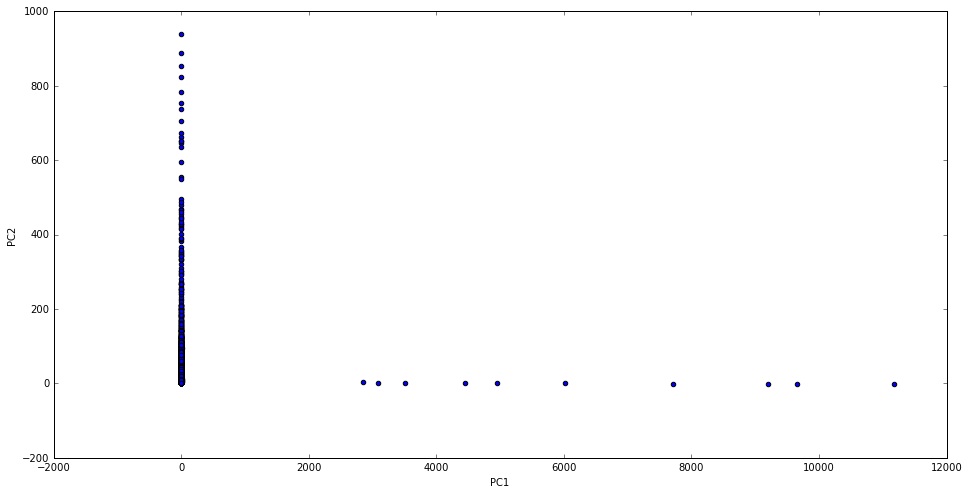

In [10]:
tsvd_df.plot(x='PC1', y='PC2', kind='scatter', figsize=(16,8))
plt.show()

#### 7. Fit the kmeans

In [18]:
K=10
kmeans = KMeans(n_clusters=K)
kmeans.fit(X_countv)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### 8. Check the performance of our kmeans test

In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print metrics.silhouette_score(X_countv, labels, metric='euclidean')

0.640023063057


In [20]:
print len(countv.get_feature_names())
print len(tsvd_df.PC2)

130107
11314


In [21]:
#graph = tsvd_df.plot(x='PC1', y='PC2', kind='scatter', figsize=(16,8)) #c=labels.astype(np.float)*10, s=50, )

#for i, words in enumerate(countv.get_feature_names()):
#    graph.annotate(words, (tsvd_df.iloc[i].PC2, tsvd_df.iloc[i].PC1))

#### Classification Report

In [22]:
print metrics.accuracy_score(y, labels)
print
print metrics.classification_report(y, labels)
print
print(metrics.confusion_matrix(y, labels))

0.0396853455895

             precision    recall  f1-score   support

          0       0.04      0.90      0.08       480
          1       0.00      0.00      0.00       584
          2       1.00      0.00      0.01       591
          3       0.02      0.02      0.02       590
          4       0.02      0.00      0.00       578
          5       0.00      0.00      0.00       593
          6       0.00      0.00      0.00       585
          7       0.00      0.00      0.00       594
          8       0.00      0.00      0.00       598
          9       0.00      0.00      0.00       597
         10       0.00      0.00      0.00       600
         11       0.00      0.00      0.00       595
         12       0.00      0.00      0.00       591
         13       0.00      0.00      0.00       594
         14       0.00      0.00      0.00       593
         15       0.00      0.00      0.00       599
         16       0.00      0.00      0.00       546
         17       0.00      

#### Confusion Matrix

In [23]:
TruncatedSVD?

#### Note: Repeat the kmeans test with varying values of "k" to determine the best performance